# Atypical country

In [1]:
from ATENA_PRO.src.ATENA_A_EDA.benchmark.atena.simulation.dataset import DatasetMeta, SchemaName, NetflixDatasetName, \
    Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_meta = DatasetMeta(SchemaName.NETFLIX, NetflixDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
df = dataset.load_data()

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
2,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
3,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
4,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Queries

In [3]:
# Before we start with the analysis, we need to clean the data by removing any missing values and converting the necessary columns to the correct data types.

# Drop any rows with missing values
df.dropna(inplace=True)

# Convert the date_added column to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'])

# Convert the release_year column to integer data type
df['release_year'] = df['release_year'].astype(int)

# Convert the duration column to integer data type
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]))

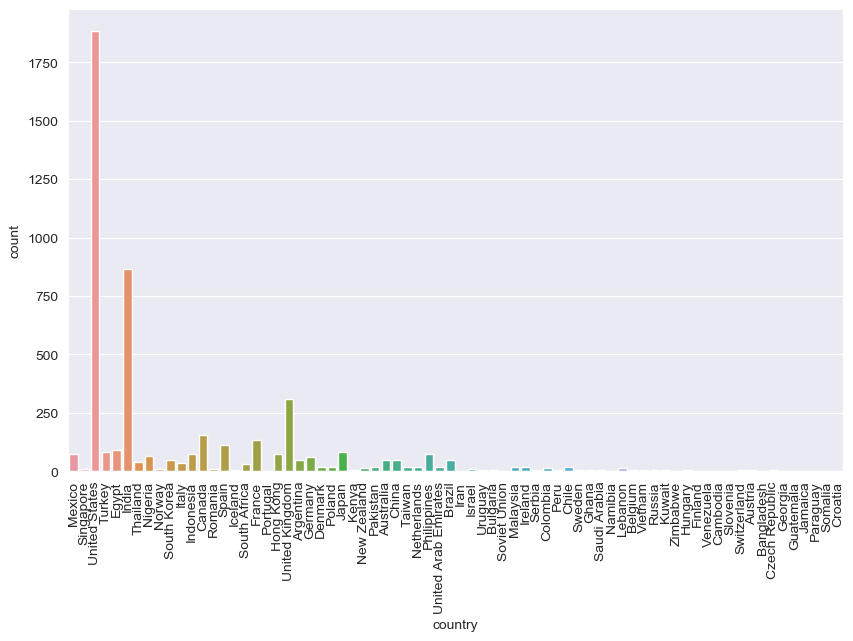

In [4]:
# Now that we have cleaned the data, we can start with the analysis. We will start by exploring the distribution of the countries in the dataset.

# Plot the distribution of the countries in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df)
plt.xticks(rotation=90)
plt.show()

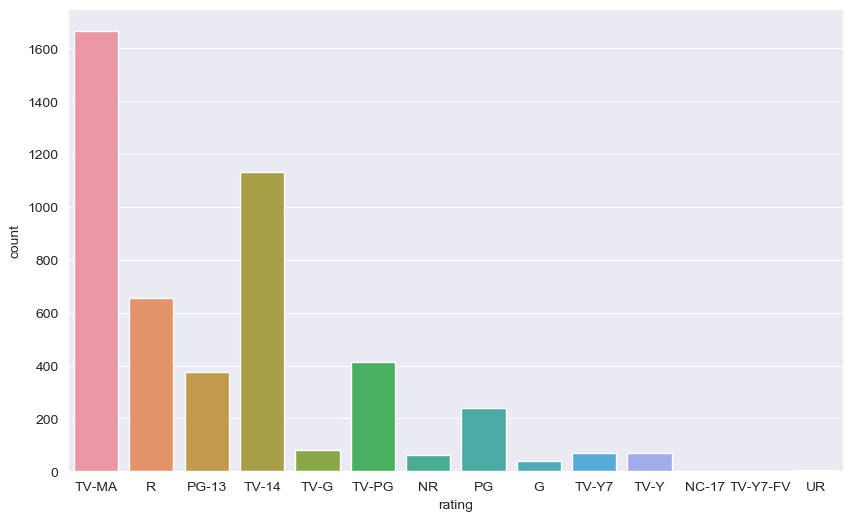

In [5]:
# Next, we will explore the distribution of the ratings in the dataset.

# Plot the distribution of the ratings in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.show()

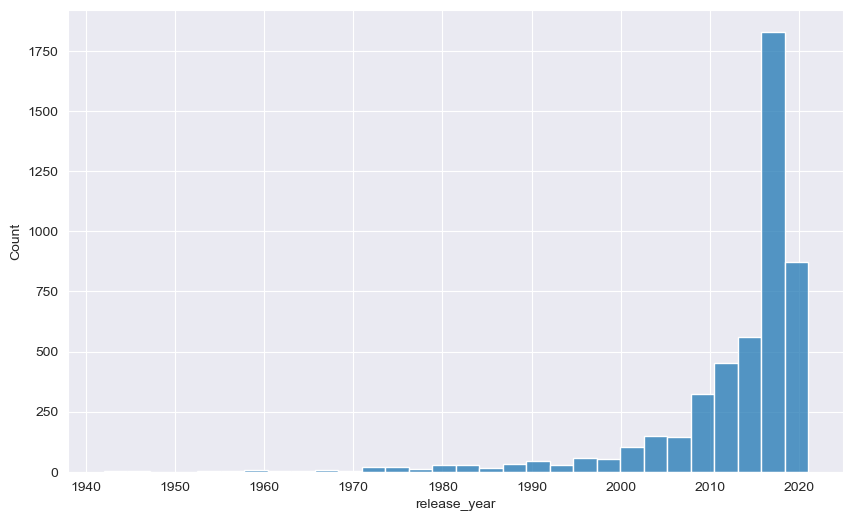

In [6]:
# Now, we will explore the distribution of the release years in the dataset.

# Plot the distribution of the release years in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(x='release_year', data=df, bins=30)
plt.show()

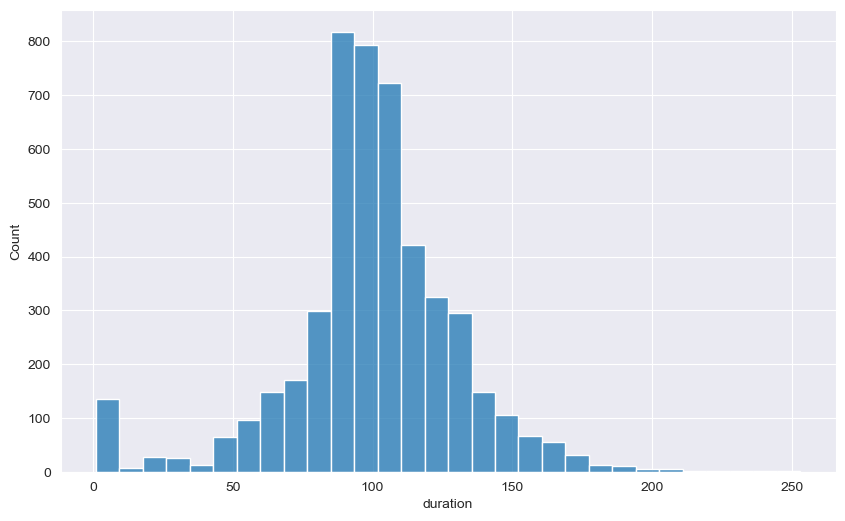

In [7]:
# Next, we will explore the distribution of the durations in the dataset.

# Plot the distribution of the durations in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(x='duration', data=df, bins=30)
plt.show()

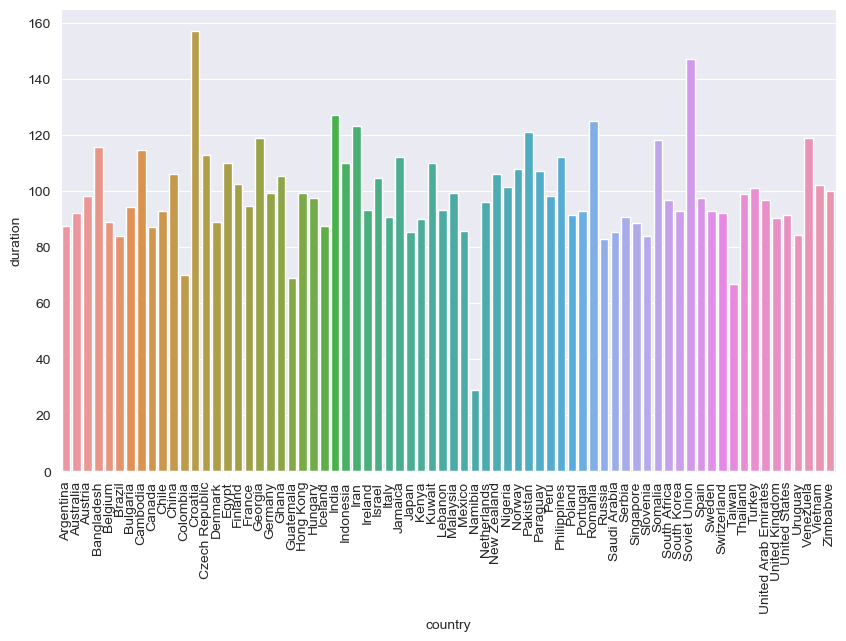

In [8]:
# Finally, we will explore the viewing habits of different countries by looking at the average duration of the content in each country.

# Calculate the average duration of the content in each country
avg_duration_by_country = df.groupby('country')['duration'].mean().reset_index()

# Plot the average duration of the content in each country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='duration', data=avg_duration_by_country)
plt.xticks(rotation=90)
plt.show()